In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc import adia_analysis

## large detuning, BAQ 

{'Q1_freq': '6000.0MHz', 'Q1_anhar': '-125.0MHz', 'Q2_freq': '8000.0MHz', 'Q2_anhar': '-150.0MHz', 'Q3_freq': '5400.0MHz', 'Q3_anhar': '-125.0MHz', 'g12': '124.7077MHz', 'g13': '10.2458MHz', 'g23': '118.3081MHz'}


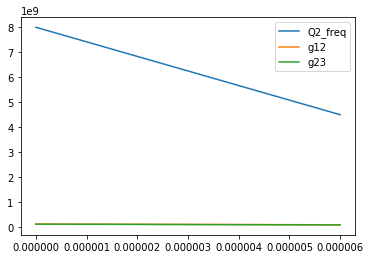

In [2]:
raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

flux_pulse = np.linspace(0/9,3.5/7,6000)
# flux_pulse = np.linspace(8/9,0/9,6000)
freq_array = 8e9 -flux_pulse * (8e9 - 1e9)

raw_config.setValue('Q1 f01_max',6.00e9)
raw_config.setValue('Q2 f01_max',8e9)
raw_config.setValue('Q3 f01_max',5.4e9)
raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.3e9)
raw_config.setValue('Q3 Ec',0.25e9)

raw_config.setValue('r12',0.018)
raw_config.setValue('r23',0.018)
raw_config.setValue('r13',0.0018)

raw_config.setValue('Q2 Voltage period',-1)
raw_config.setValue('Q2 Voltage operating point',0.00)
raw_config.setValue('Q2 Flux',flux_pulse)

# raw_config.setValue('Uniform XY LO',True)
# raw_config.setValue('XY LO Freq',5.94e9)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.show_pulse()

In [25]:
Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=2e6)

In [26]:
Simulator.EigenResult.show_eigenenergy()

In [27]:
eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
eigen_trace_C = Simulator.EigenResult.get_Ener_gap_trace('111-110-011+010')

fig = plt.figure(figsize=[6.4,6])
ax = fig.add_subplot(111)
# ZZ_from_top_00024 = eigen_trace
# ZZ_from_top_00012 = eigen_trace
# ZZ_from_top_00018 = eigen_trace
ax.plot(freq_array/1e9,eigen_trace/1e6)
ax.plot(freq_array/1e9,eigen_trace_C/1e6)

In [12]:
%matplotlib inline

In [20]:
%matplotlib qt

In [56]:
Eigen101=Simulator.EigenResult.eigen_ener[:,10]/1e9
Eigen011=Simulator.EigenResult.eigen_ener[:,4]/1e9
Eigen110=Simulator.EigenResult.eigen_ener[:,12]/1e9
Eigen200=Simulator.EigenResult.eigen_ener[:,18]/1e9
Eigen020=Simulator.EigenResult.eigen_ener[:,6]/1e9
Eigen002=Simulator.EigenResult.eigen_ener[:,2]/1e9
Eigen001=Simulator.EigenResult.eigen_ener[:,1]/1e9
Eigen010=Simulator.EigenResult.eigen_ener[:,3]/1e9
Eigen100=Simulator.EigenResult.eigen_ener[:,9]/1e9

In [57]:
# tab:blue	#1f77b4
# tab:orange	#ff7f0e
# tab:green	#2ca02c
# tab:red	#d62728
# tab:purple	#9467bd
# tab:brown	#8c564b
# tab:pink	#e377c2
# tab:gray	#7f7f7f
# tab:olive	#bcbd22
# tab:cyan	#17becf

(3.6, 13.6)

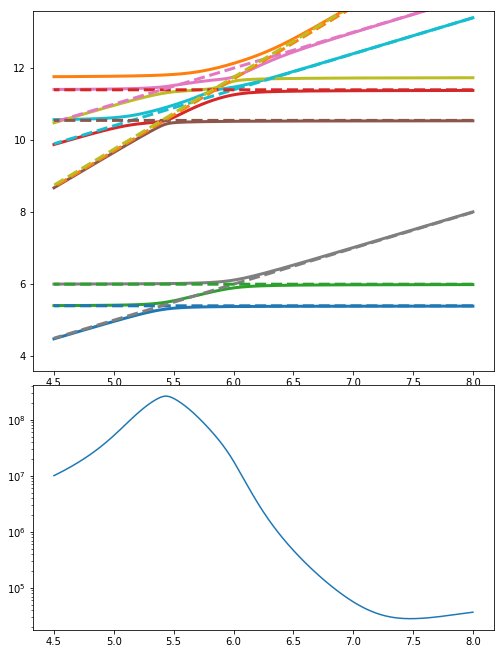

In [58]:
fig=plt.figure(figsize=[8,10])
# ax = fig.add_subplot(111)
ax = fig.add_axes([0.1,0.46,0.8,0.5])
ax2 = fig.add_axes([0.1,0.1,0.8,0.34])

lw=3
ax.plot(freq_array/1e9,Eigen011,label='011',linewidth=lw,c='tab:cyan')
ax.plot(freq_array/1e9,Eigen101,label='101',linewidth=lw,c='tab:red')
ax.plot(freq_array/1e9,Eigen110,label='110',linewidth=lw,c='tab:pink')
ax.plot(freq_array/1e9,Eigen002,label='002',linewidth=lw,c='tab:brown')
ax.plot(freq_array/1e9,Eigen020,label='020',linewidth=lw,c='tab:orange')
ax.plot(freq_array/1e9,Eigen200,label='200',linewidth=lw,c='tab:olive')
ax.plot(freq_array/1e9,Eigen001,label='001',linewidth=lw,c='tab:blue')
ax.plot(freq_array/1e9,Eigen010,label='010',linewidth=lw,c='tab:gray')
ax.plot(freq_array/1e9,Eigen100,label='100',linewidth=lw,c='tab:green')

ax2.plot(freq_array/1e9,-1*ZZ_from_top_00018,'-')


ax.plot(freq_array/1e9,freq_array/1e9 + 5.4,linewidth=lw,c='tab:cyan',linestyle='--')
ax.plot(freq_array/1e9,11.4*np.ones(len(freq_array)),linewidth=lw,c='tab:red',linestyle='--')
ax.plot(freq_array/1e9,freq_array/1e9 + 6.0,linewidth=lw,c='tab:pink',linestyle='--')
ax.plot(freq_array/1e9,freq_array*0+5.4*2-0.25,linewidth=lw,c='tab:brown',linestyle='--')
ax.plot(freq_array/1e9,freq_array/1e9*2 - 0.3,linewidth=lw,c='tab:orange',linestyle='--')
ax.plot(freq_array/1e9,freq_array/1e9*2 - 0.25,linewidth=lw,c='tab:olive',linestyle='--')
ax.plot(freq_array/1e9,freq_array*0+5.4,linewidth=lw,c='tab:blue',linestyle='--')
ax.plot(freq_array/1e9,freq_array/1e9,linewidth=lw,c='tab:gray',linestyle='--')
ax.plot(freq_array/1e9,freq_array*0+6,linewidth=lw,c='tab:green',linestyle='--')



ax2.set_yscale('log')
ax.set_ylim([3.6,13.6])

In [59]:
ZZ_TRACE=[]
r_arr = np.linspace(0,0.0025,26)
for r13 in r_arr:
    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

    flux_pulse = np.linspace(0/9,3.6/9,600)
    freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

    raw_config.setValue('Q1 f01_max',6.00e9)
    raw_config.setValue('Q2 f01_max',9e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.3e9)
    raw_config.setValue('Q3 Ec',0.25e9)

    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',r13)

    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0.00)
    raw_config.setValue('Q2 Flux',flux_pulse)

    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)
    Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=10e6)
    eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
    print(r13)
    ZZ_TRACE.append(eigen_trace)

0.0
0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007
0.0008
0.0009000000000000001
0.001
0.0011
0.0012000000000000001
0.0013000000000000002
0.0014
0.0015
0.0016
0.0017000000000000001
0.0018000000000000002
0.0019
0.002
0.0021000000000000003
0.0022
0.0023
0.0024000000000000002
0.0025


In [60]:
# fig=plt.figure(figsize=[9.6,5.6])
# # ax = fig.add_axes([0.1,0.46,0.8,0.5])
# ax2 = fig.add_axes([0.1,0.1,0.8,0.34])

# for i in range(len(ZZ_TRACE)):
#     ax2.plot(freq_array/1e9,-1*ZZ_TRACE[i],c=[0.2,0.5,0.4+0.6*i/len(ZZ_TRACE)])

# # ax2.plot(freq_array/1e9,-1*ZZ_from_top_00024,'--')
# # ax2.plot(freq_array/1e9,-1*ZZ_from_top_00012)
# # ax2.plot(freq_array/1e9,-1*ZZ_from_top_00000)

# ax2.set_yscale('log')
# ax.set_ylim([3.6,13.6])

In [1]:
from matplotlib import cm
from matplotlib import *

fig = plt.figure(figsize=[8,7.2])
ax = fig.add_axes([0.1,0.1,0.78,0.76])
ax_colorbar = fig.add_axes([0.9,0.1,0.02,0.76])
X,Y = np.meshgrid(freq_array/1e9,r_arr*1000)
im = ax.pcolor(X,Y,np.abs(ZZ_TRACE)/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=5e-5,vmax=80)
colarbar= plt.colorbar(im,cax=ax_colorbar)


ax.plot(freq_array[0:450]/1e9,r12_zero_geff(6e9,5.4e9,freq_array[0:450],0.018,0.018)*1000,'k')

ax.set_ylim([0,2.5])
ax.tick_params(labelsize=16)
ax_colorbar.tick_params(labelsize=16)

NameError: name 'plt' is not defined

In [147]:
len(freq_array)

600

In [62]:
def r12_zero_geff(w1,w2,wc,r1c,r2c):
    g1cg2c = np.sqrt(w1*wc)*r1c*np.sqrt(w2*wc)*r2c
    g12 = -g1cg2c*(1/(w1-wc)+1/(w2-wc)-1/(w1+wc)-1/(w2+wc))/2
    return g12/(np.sqrt(w1*w2))

In [63]:
r12_zero_geff(6e9,5.4e9,8e9,0.018,0.018)

0.0013357493849434148

In [130]:
# fig=plt.figure(figsize=[8.4,6.4])
# ax1=fig.add_subplot(111)
# surf1=ax1.pcolor(X,Y,abs(ZZ_min)/1e6+0.000000,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=5e-5,vmax=80)
# colarbar2=plt.colorbar(surf1,orientation='horizontal')
# ax1.plot(d_Q2_freq_array[50:],k_data[50:],c='k',linestyle='--')

In [65]:
%matplotlib qt

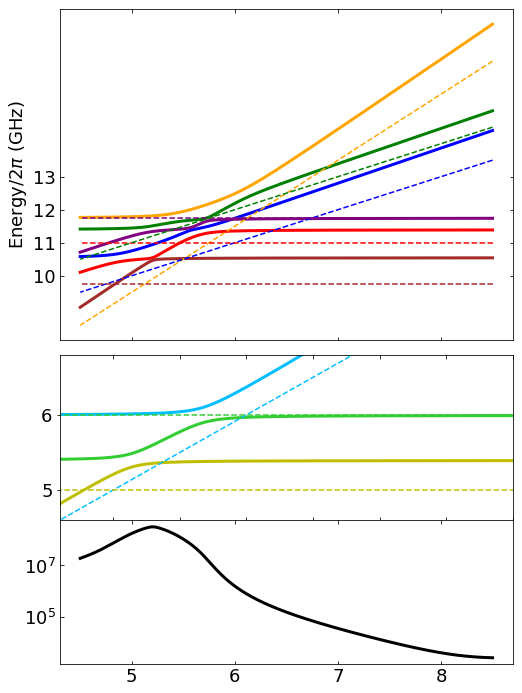

In [49]:
fig=plt.figure(figsize=[8.4,10])
ax = fig.add_axes([0.14,0.52,0.75,0.46])
ax010 = fig.add_axes([0.14,0.27,0.75,0.23])

lw=3
ax.plot(freq_array/1e9,Eigen011,label='011',linewidth=lw,c='blue')
ax.plot(freq_array/1e9,Eigen101,label='101',linewidth=lw,c='red')
ax.plot(freq_array/1e9,Eigen110,label='110',linewidth=lw,c='green')
ax.plot(freq_array/1e9,Eigen002,label='002',linewidth=lw,c='brown')
ax.plot(freq_array/1e9,Eigen020,label='020',linewidth=lw,c='orange')
ax.plot(freq_array/1e9,Eigen200,label='200',linewidth=lw,c='purple')
ax010.plot(freq_array/1e9,Eigen001,label='001',linewidth=lw,c='y')
ax010.plot(freq_array/1e9,Eigen010,label='010',linewidth=lw,c='deepskyblue')
ax010.plot(freq_array/1e9,Eigen100,label='100',linewidth=lw,c='limegreen')

ax.set_ylabel('Energy/2$\pi$ (GHz)')
ax.tick_params(labelsize=18)
ax010.tick_params(labelsize=18)
# ax_inset.tick_params(labelsize=18)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.plot(freq_array/1e9,freq_array*2/1e9 - 0.5,linestyle = '--',c='orange' )
ax.plot(freq_array/1e9,freq_array/1e9 + 5 ,linestyle = '--',c='blue' )
ax.plot(freq_array/1e9,freq_array/1e9*0 + 11 ,linestyle = '--',c='red' )
ax.plot(freq_array/1e9,freq_array/1e9*0 + 9.75 ,linestyle = '--',c='brown' )
ax.plot(freq_array/1e9,freq_array/1e9*0 + 11.75 ,linestyle = '--',c='purple' )
ax.plot(freq_array/1e9,freq_array/1e9 + 6 ,linestyle = '--',c='green' )


ax010.plot(freq_array/1e9,freq_array/1e9,linestyle = '--',c='deepskyblue' )
ax010.plot(freq_array/1e9,freq_array*0+6,linestyle = '--',c='limegreen' )
ax010.plot(freq_array/1e9,freq_array*0+5,linestyle = '--',c='y' )


ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False,
    direction='in' )
# ax.set_xlim(4.6,8.0)
# ax.set_ylim(9.2,13.6)
ax010.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False,
    direction='in' )
ax010.set_xlim(4.6,8.0)
ax010.set_ylim(4.6,6.8)

ax.set_yticks([10,11,12,13])

# ax.legend(fontsize=18,ncol=3,loc=[0.04,0.3])
    
############################################### adiabatic ###################


# leakage101 = adia_analysis.get_total_leakage(Simulator.EigenResult.eigen_ener,Simulator.EigenResult.eigen_state,10,40e-9)*40e-9/4e9
# leakage100 = adia_analysis.get_total_leakage(Simulator.EigenResult.eigen_ener,Simulator.EigenResult.eigen_state,9,40e-9)*40e-9/4e9
# leakage001 = adia_analysis.get_total_leakage(Simulator.EigenResult.eigen_ener,Simulator.EigenResult.eigen_state,1,40e-9)*40e-9/4e9
# eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')

ax2= fig.add_axes([0.14,0.07,0.75,0.2])
# ax_leak= ax2.twinx()
# ax_leak.plot(freq_array[:-1]/1e9,np.log10(leakage101),c='magenta',label = 'LeakCoeff',linewidth=lw)
# # ax_leak.plot(freq_array[:-1]/1e9,np.log10(leakage100),c='grey',linestyle = '-.',label = 'LeakCoeff',linewidth=lw)
# # ax_leak.plot(freq_array[:-1]/1e9,leakage001,c='dimgray',linestyle = '-.',label = 'LeakCoeff',linewidth=lw)
# # ax_leak.set_yscale('log')

ax2.plot(freq_array/1e9,abs(eigen_trace),c='k',label = 'ZZ coupling ',linewidth=lw)

# ax2.plot(np.linspace(6500,8200,400)/1e3,-1e6*perturbation_ZZ_coupling_strength(6000,5000,np.linspace(6500,8200,400),0.017,0.017,0.0010,-250,-500,-250),'r')
# ax2.plot(np.linspace(6500,8200,400)/1e3,-1e6*perturbation_result(6000,5000,np.linspace(6500,8200,400),0.017,0.017,0.0010,-250,-500,-250))

# ax2.plot(np.linspace(4500,8500,600)/1e3,np.abs(np.array(trace101)-np.array(trace100)-np.array(trace001))*1e-3,c='k',linestyle='--',linewidth=lw)
# ax2.plot( np.linspace(5.3,6,200),    get_analytical_zz(np.linspace(5.3,6,200),5,-0.5, 0.016*np.sqrt(np.linspace(5.3,6,200)*5) ))
ax2.set_yscale('log')
# ax2.set_xlim(4.6,8.0)

# ax2_inset = fig.add_axes([0.62,0.27,0.24,0.12])
# idle_position=225
# ax2_inset.plot(freq_array[0:idle_position]/1e9,abs(eigen_trace[0:idle_position])/1e3,c='k',linewidth=lw)
# ax2_inset.plot(np.linspace(4500,8500,600)[600-idle_position:600]/1e3,np.abs(np.array(trace101)-np.array(trace100)-np.array(trace001))[600-idle_position:600]*1e-6,c='k',linestyle='--',linewidth=lw)


# ax_leak.tick_params(labelsize=18)
# ax_leak.xaxis.label.set_size(18)
# ax_leak.yaxis.label.set_size(18)
# ax_leak.set_xlim([4.5,8.5])

ax2.tick_params(labelsize=18)
# ax2.xaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)
# ax2_inset.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

ax.tick_params('both',bottom=True, top=True, left=True, right =True,direction='in')
# ax2_inset.tick_params('both',bottom=True, top=True, left=True, right =True,direction='in')
ax2.tick_params('both',bottom=True, top=True, left=True, right =False,direction='in')
# ax_leak.tick_params('both',bottom=False, top=False, left=False, right =True,direction='in')

## perturbation results

In [67]:
def perturbation_ZZ_coupling_strength(Q1_freq,Q2_freq,Q3_freq,r12,r23,r13,anhar_1,anhar_2,anhar_3):
    g12= r12*np.sqrt(Q1_freq*Q2_freq)
    g23= r23*np.sqrt(Q3_freq*Q2_freq)
    g13= r13*np.sqrt(Q1_freq*Q3_freq)
    k = Q2_freq*g13/(g12*g23)
    
    delta12=Q1_freq-Q3_freq
    delta1c=Q1_freq-Q2_freq
    delta2c=Q3_freq-Q2_freq
    omega_c=Q2_freq
    omega_1=Q1_freq
    omega_2=Q3_freq
    alpha1=anhar_1
    alpha2=anhar_3
    alphac=anhar_2
    
    zeta1=-2/(delta12+alpha1)*(k/omega_c+(2*omega_c+delta12+alpha1)/((2*omega_c+delta1c+alpha1)*delta2c ))**2
    zeta2=2/(delta12-alpha2)*(k/omega_c+(2*omega_c-delta12+alpha2)/((2*omega_c+delta2c+alpha2)*delta1c ) )**2
    zeta3=2/(delta1c*delta2c)*(2*k/omega_c)
    zeta4 = (2/(delta1c+delta2c-alphac)-2/(2*omega_c+alphac)+1/(2*omega_c+delta1c+delta2c))*(1/delta1c+1/delta2c)**2
    
    return g12*g12*g23*g23*(zeta1+zeta2+zeta3+zeta4)


def perturbation_result(Q1_freq,Qc_freq,Q2_freq,r1c,r2c,r12,anhar1,anharc,anhar2):
    g1c= r1c*np.sqrt(Q1_freq*Qc_freq)
    g2c= r2c*np.sqrt(Q2_freq*Qc_freq)
    g12= r12*np.sqrt(Q1_freq*Q2_freq)
    k = Qc_freq*g12/(g1c*g2c)
    
    delta12=Q1_freq-Q2_freq
    delta1c=Q1_freq-Qc_freq
    delta2c=Q2_freq-Qc_freq
    omega_c=Qc_freq
    omega_1=Q1_freq
    omega_2=Q2_freq
    alpha1=anhar1
    alphac=anharc
    alpha2=anhar2
    
    zeta1=(-2/(delta12+alpha1)  )*(k/omega_c+1/delta2c-1/(2*omega_c+delta1c+alpha1))**2
    zeta2=2/(delta12-alpha2)*(k/omega_c+1/delta1c-1/(2*omega_c+delta2c+alphac))**2
    zeta3=2/(delta1c*delta2c)*2*k/omega_c 
    zeta4=(2/(delta1c+delta2c-alphac))*(1/delta1c+1/delta2c)**2
    
    return g1c**2*g2c**2*(zeta1+zeta2+zeta3+zeta4)